In [1]:
from fonctions import *

In [2]:
dic_EN = lire_json('entites_nommees.json')

In [3]:
liste_tagEN = [x[1] for x in dic_EN.values()]
liste_titres = [x[2] for x in dic_EN.values()]

In [7]:
X, V = creer_X(liste_tagEN, 1, 2)

print(X[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
from scipy.spatial.distance import cdist
from sklearn import metrics 

In [33]:
distortions = [] 
inertias = []  

for k in range(1, 10): # test en allant de 1 à 9 clusters
    kmeanModel = creer_model_KM(k, X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                    'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)

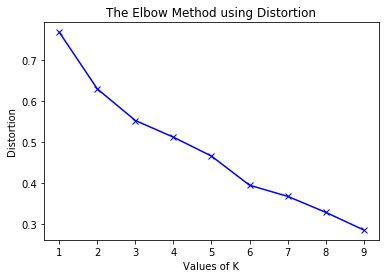

In [34]:
K = range(1, 10)
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

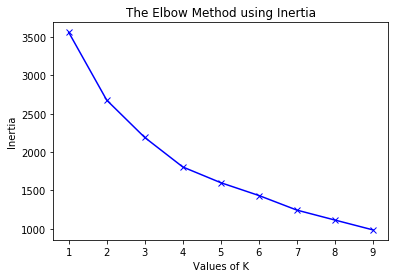

In [35]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [36]:
model = creer_model_KM(4, X)

predictions = model.predict(X)

print(predictions[:100])
print(effectifs_clusters(model))

[0 0 2 0 2 3 2 0 1 1 3 1 1 0 2 2 1 0 0 0 0 0 2 0 3 1 3 1 1 1 1 1 3 3 0 0 3
 3 3 3 2 0 2 2 2 1 1 3 2 1 3 1 0 2 3 0 0 2 0 1 3 3 3 1 0 0 0 1 3 0 1 2 0 1
 0 1 3 3 3 0 2 2 2 3 1 0 0 1 1 0 3 2 3 1 2 2 0 2 0 2]
{0: 2057, 2: 816, 3: 1226, 1: 1586}


In [37]:
dictionnaire = dic_complet(X, predictions, liste_tagEN, liste_titres)

afficher_titres_hasard(4, dictionnaire)

Cluster 0 : 2057 articles
Le marché suisse des génériques croîtra de manière plus modérée

Selon le Pr Abdelaziz Graba, chef de service au CPMC : Une personne sur deux risque de développer un cancer de lestomac après 60 ans
MISC ORG
SPORT : Albrecht dans un coma artificiel
ORG LOC
Le Hamas promet "la victoire", la diplomatie s'active en vue d'une trêve
ORG
----------
Cluster 1 : 1586 articles
Cameroun : l'appui direct aux paysans pour juguler la crise alimentaire est une urgence (étude)
LOC
Religion / Solidarité : L'appel du cardinal Poupard
LOC LOC
Offensive xénophobe sur l'éducation et la santé en Italie
LOC
Eco-Emballages a placé de l'argent dans des paradis fiscaux
LOC
----------
Cluster 2 : 816 articles
REVUE DE LA PRESSE CONGOLAISE DE CE MARDI
MISC MISC ORG
Gouvernance : Le directeur de lhôpital central sanctionné
MISC
Russie: décès d'Alexis II, artisan de la renaissance de l'Eglise orthodoxe russe
LOC PER MISC
Open d'Australie : le très beau mardi des Français
MISC
----------
Cl

In [38]:
dimensions_clusters(model, V)

Cluster 0:
(ORG) | (ORG LOC) | (LOC) | (LOC ORG) | (ORG ORG) | (PER) | (ORG PER) | (MISC) | (MISC ORG) | (PER ORG) | 
----------
Cluster 1:
(LOC) | (LOC LOC) | (PER) | (LOC PER) | (PER LOC) | (ORG) | (LOC ORG) | (MISC) | (LOC MISC) | (MISC LOC) | 
----------
Cluster 2:
(MISC) | (MISC LOC) | (LOC MISC) | (LOC) | (MISC MISC) | (PER MISC) | (PER) | (MISC PER) | (PER LOC) | (LOC PER) | 
----------
Cluster 3:
(PER) | (LOC PER) | (PER PER) | (PER LOC) | (LOC) | (PER MISC) | (MISC) | (MISC PER) | (ORG) | (ORG PER) | 
----------


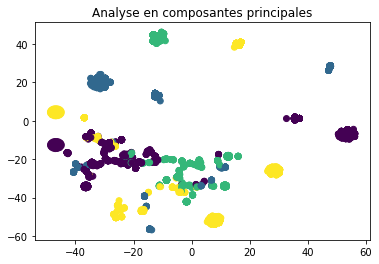

In [39]:
tracer_ACP(X, predictions)

In [40]:
X.shape

(5685, 20)